# Schneider Electric  Data Science challenge



## PART I : CNN with transfer learning



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

In [3]:
ruta=os.getcwd()+'/drive/MyDrive/Schneider competition/train_test_data'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Defining training, validation and test directories roots

In [5]:
train_data_dir=ruta+"/training"
validation_data_dir=ruta+"/validation"
test_data_dir=ruta+"/test"

### Data Agumentation

Defining Initial parameters for CNN

In [6]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
inception_v3_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10, 
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input
)
train_generator_inception_v3 = inception_v3_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(300, 300),  
        batch_size=16,
        class_mode="categorical",
        shuffle=False,
)


val_generator_inception_v3 = inception_v3_datagen.flow_from_directory(
        validation_data_dir,  
        target_size=(300, 300),  
        batch_size=16,
        class_mode="categorical",
        shuffle=False,
)


Found 1857 images belonging to 3 classes.
Found 445 images belonging to 3 classes.


### Inception architecture

In [7]:
import tensorflow
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, GlobalAveragePooling2D, UpSampling2D, Input, LeakyReLU
from keras.layers import Conv2DTranspose
from tensorflow.keras.layers import MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import Sequence
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.inception_v3 import InceptionV3
from sklearn.neural_network import MLPClassifier
from keras.utils.vis_utils import plot_model
from keras.layers.core import Dense, Activation, Dropout
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix
import keras
from keras import layers

In [8]:
InceptionV3_model = tensorflow.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))

for layer in InceptionV3_model.layers[:-15]:
    layer.trainable = False

x = InceptionV3_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.3)(x)
# Define last layer fully conected and set 3 categories
output  = Dense(units=3, activation='softmax')(x)
model_inception = Model(InceptionV3_model.input, output)

model_inception.summary()


87910968/87910968 [==============================] - 4s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                  

In [9]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model_inception.compile(
        optimizer=optimizer,
        loss="categorical_crossentropy",
        metrics=["accuracy"])
history_inception = model_inception.fit(train_generator_inception_v3,  epochs=10, validation_data=val_generator_inception_v3, validation_steps=10)

Epoch 1/10
117/117 [==============================] - 997s 8s/step - loss: 1.1652 - accuracy: 0.3393 - val_loss: 0.5912 - val_accuracy: 1.0000
Epoch 2/10
117/117 [==============================] - 54s 463ms/step - loss: 1.0766 - accuracy: 0.4163 - val_loss: 0.6128 - val_accuracy: 1.0000
Epoch 3/10
117/117 [==============================] - 55s 467ms/step - loss: 1.0346 - accuracy: 0.4685 - val_loss: 1.1215 - val_accuracy: 0.2125
Epoch 4/10
117/117 [==============================] - 55s 468ms/step - loss: 1.0154 - accuracy: 0.4755 - val_loss: 0.7516 - val_accuracy: 0.8562
Epoch 5/10
117/117 [==============================] - 54s 458ms/step - loss: 0.9331 - accuracy: 0.5514 - val_loss: 0.5792 - val_accuracy: 0.8875
Epoch 6/10
117/117 [==============================] - 54s 460ms/step - loss: 0.8263 - accuracy: 0.6252 - val_loss: 1.1584 - val_accuracy: 0.3938
Epoch 7/10
117/117 [==============================] - 55s 471ms/step - loss: 0.7697 - accuracy: 0.6333 - val_loss: 0.8791 - val_accu

In [ ]:
predictions=model_inception.predict_generator(generator=val_generator_inception_v3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
import numpy as np

In [ ]:
y_pred=np.argmax(predictions, axis=1)
y_real= val_generator_inception_v3.classes

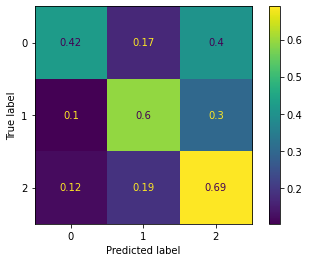

In [ ]:
 from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_real, y_pred, normalize='true');

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_real,y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.7455    0.4249    0.5413       193
           1     0.5956    0.5956    0.5956       136
           2     0.4020    0.6897    0.5079       116

    accuracy                         0.5461       445
   macro avg     0.5810    0.5700    0.5483       445
weighted avg     0.6101    0.5461    0.5492       445



I get a poor performance, i'll try with other architecture

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input
EfficientNetB3_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.10,
    brightness_range=[0.6,1.4],
    channel_shift_range=0.7,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=0.15,
    horizontal_flip=True,

    fill_mode='nearest',
    preprocessing_function=preprocess_input
) 
train_generator_EfficientNetB3 = EfficientNetB3_datagen.flow_from_directory(
        train_data_dir,  
        target_size=(300, 300), 
        batch_size=20,
        class_mode="categorical",
        shuffle=True,
)


val_generator_EfficientNetB3 = EfficientNetB3_datagen.flow_from_directory(
        validation_data_dir,  
        target_size=(300, 300), 
        batch_size=32,
        class_mode="categorical",
        shuffle=False,
)

Found 1857 images belonging to 3 classes.
Found 445 images belonging to 3 classes.


In [ ]:
img_shape=(300, 300, 3)
model_name='EfficientNetB3'
EfficientNetB3_model=tensorflow.keras.applications.efficientnet.EfficientNetB3(include_top=False, weights="imagenet",input_shape=img_shape, pooling='max') 
for layer in EfficientNetB3_model.layers[:-15]:
    layer.trainable = False
x = EfficientNetB3_model.output
x = BatchNormalization(axis=-1, epsilon=0.001)(x)
x = Dense(256,activation='relu')(x)
x = Dropout(rate=.3)(x)       
output=Dense(3, activation='softmax')(x)
EfficientNetB3_model = Model(inputs=EfficientNetB3_model.input, outputs=output)


In [ ]:
optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
EfficientNetB3_model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy']) 
history_eff = EfficientNetB3_model.fit(train_generator_EfficientNetB3, epochs=15, validation_data=val_generator_EfficientNetB3)

Epoch 1/15
93/93 [==============================] - 81s 765ms/step - loss: 1.1552 - accuracy: 0.5412 - val_loss: 0.9027 - val_accuracy: 0.6427
Epoch 2/15
93/93 [==============================] - 68s 737ms/step - loss: 0.9492 - accuracy: 0.6042 - val_loss: 0.8732 - val_accuracy: 0.6090
Epoch 3/15
93/93 [==============================] - 69s 740ms/step - loss: 0.8802 - accuracy: 0.6327 - val_loss: 0.8835 - val_accuracy: 0.6337
Epoch 4/15
93/93 [==============================] - 69s 738ms/step - loss: 0.8440 - accuracy: 0.6484 - val_loss: 0.7501 - val_accuracy: 0.6787
Epoch 5/15
93/93 [==============================] - 69s 738ms/step - loss: 0.7647 - accuracy: 0.6812 - val_loss: 0.7448 - val_accuracy: 0.7101
Epoch 6/15
93/93 [==============================] - 69s 739ms/step - loss: 0.7530 - accuracy: 0.6909 - val_loss: 0.8160 - val_accuracy: 0.6652
Epoch 7/15
93/93 [==============================] - 69s 739ms/step - loss: 0.6936 - accuracy: 0.7151 - val_loss: 0.8090 - val_accuracy: 0.6562

In [ ]:
predictions_efficient=EfficientNetB3_model.predict_generator(generator=val_generator_EfficientNetB3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


In [ ]:
predictions_efficient

array([[9.9994314e-01, 1.5644542e-07, 5.6743982e-05],
       [9.9084657e-01, 7.0926052e-04, 8.4441146e-03],
       [8.7834853e-01, 1.2954999e-03, 1.2035594e-01],
       ...,
       [8.4197909e-02, 2.9147379e-02, 8.8665468e-01],
       [1.0347750e-02, 1.7957047e-02, 9.7169524e-01],
       [2.8405355e-02, 3.2216147e-01, 6.4943320e-01]], dtype=float32)

In [ ]:
y_real_eff

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
y_pred_eff=np.argmax(predictions_efficient, axis=1)
y_real_eff= val_generator_EfficientNetB3.classes

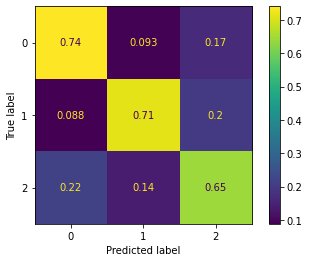

In [ ]:
 from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_real_eff, y_pred_eff, normalize='true');

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_real_eff,y_pred_eff, digits=4))

              precision    recall  f1-score   support

           0     0.7944    0.7409    0.7668       193
           1     0.7405    0.7132    0.7266       136
           2     0.5597    0.6466    0.6000       116

    accuracy                         0.7079       445
   macro avg     0.6982    0.7002    0.6978       445
weighted avg     0.7168    0.7079    0.7110       445



In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
for i in os.listdir(test_data_dir):
  img=image.load_img(test_data_dir+'/'+i, target_size=(300,300))
  X=image.img_to_array(img)
  X=np.expand_dims(X,axis=0)
  images=np.vstack([X])
  val=EfficientNetB3_model.predict(images)

1/1 [==============================] - 0s 34ms/step


In [ ]:
test_data_dir=ruta+"/test"

In [ ]:
test_data_dir

'/content/drive/MyDrive/Schneider competition/train_test_data/test'

In [ ]:
import pandas as pd

In [ ]:
test_df=pd.read_csv('/content/drive/MyDrive/Schneider competition/test.csv')

In [ ]:
test_df

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png
...,...,...,...,...
630,1.650899,101.314723,2011,train_test_data/test/968.png
631,-1.645649,102.612332,2010,train_test_data/test/54.png
632,-0.557796,114.561609,2016,train_test_data/test/494.png
633,-3.037549,113.872045,2009,train_test_data/test/287.png


In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255.)
test_generator=test_datagen.flow_from_dataframe(
dataframe=test_df,
directory="/content/drive/MyDrive/Schneider competition/train_test_data/test/test/",
x_col="example_path",
y_col=None,
batch_size=32,
seed=42,
shuffle=False,
class_mode=None,
target_size=(300,300))

Found 0 validated image filenames.


/usr/local/lib/python3.7/dist-packages/keras/preprocessing/image.py:991: UserWarning: Found 635 invalid image filename(s) in x_col="example_path". These filename(s) will be ignored.
  n_invalid, x_col))


In [ ]:
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size

In [ ]:
import cv2
from tensorflow.keras.preprocessing import image as image_utils

In [ ]:
predicciones=[]
for filename in test_df['example_path']:
    # Load original via OpenCV, so we can draw on it and display it on our screen
    original = cv2.imread("/content/drive/MyDrive/Schneider competition/"+filename)

    # Load image while resizing to 224x224 pixels, then convert to a NumPy array because load_img returns 
    # Pillow format
    image = image_utils.load_img("/content/drive/MyDrive/Schneider competition/"+filename, target_size=(224, 224))
    image = image_utils.img_to_array(image)

    """
    PRE-PROCESS
    The image is now a NumPy array of shape (224, 224, 3). 224 pixels tall, 224 pixels wide, 3 channels = 
    Red, Green, Blue. We need to expand to (1, 3, 224, 224) because when classifying images using Deep
    Learning and Convolutional Neural Networks, we often send several images (instead of one) through
    the network in “batches” for efficiency. We also subtract the mean RGB pixel intensity from the
    ImageNet dataset.
    """
    image = np.expand_dims(image, axis=0)
    image = preprocess_input(image)
    predicciones.append(EfficientNetB3_model.predict(image))  


1/1 [==============================] - 0s 34ms/step


In [ ]:
predicciones=np.argmax(predicciones, axis=1)

In [ ]:
predicciones

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])